In [1]:
# Import packages

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#Define stock tickers and date range

stocks = ["AAPL", "MSFT", "TSLA"]
start_date = "2024-01-01"
end_date = "2025-12-31"


In [3]:
# Download stock data from Yahoo Finance

data = yf.download(stocks, start = start_date, end= end_date)

[*********************100%***********************]  3 of 3 completed


In [4]:
#Create 'data' folder as it doesn't exist
import os

# Make sure the folder exists
os.makedirs("../data", exist_ok=True)



In [5]:
# Save stock data to a CSV file in the 'data' folder

data.to_csv("../data/stock_data.csv")


In [6]:
data_check = pd.read_csv("../data/stock_data.csv", index_col=0)
data_check.head()


,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
Price,,,,,,,,,,,,,,,
Ticker,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,183.9032440185547,365.421630859375,248.4199981689453,186.67705163638013,370.3777351043963,251.25,182.16961614691823,361.3818569854959,244.41000366210938,185.3991117688797,368.36769584733304,250.0800018310547,82488700,25258600,104654200
2024-01-03,182.52621459960938,365.15557861328125,238.4499969482422,184.14096966630487,367.7765045721429,245.67999267578125,181.7138790075681,363.09628608901477,236.32000732421875,182.4964964795135,363.58894066618615,244.97999572753906,58414500,23083500,121082600
2024-01-04,180.20816040039062,362.5346374511719,237.92999267578125,181.37711375703753,367.6188360826796,242.6999969482422,179.1877976853389,361.7759602590735,237.72999572753906,180.44590542694291,365.2245421546535,239.25,71983600,20901500,102629300


In [7]:
# Check the data columns

data.columns


MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'TSLA'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (  'High', 'TSLA'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (   'Low', 'TSLA'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            (  'Open', 'TSLA'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [8]:
# Select only the Close prices for all tickers. 
# Handle MultiIndex columns
# For multiple tickers, columns have two levels (e.g., ('Close','AAPL'))
# Select only the Close prices

data_close = data['Close']  # This selects all columns where Level 0 is 'Close'
data_close.head()


Ticker,AAPL,MSFT,TSLA
Date,,,
2024-01-02,183.903244,365.421631,248.419998
2024-01-03,182.526215,365.155579,238.449997
2024-01-04,180.208160,362.534637,237.929993
2024-01-05,179.484970,362.347473,237.490005
2024-01-08,183.823975,369.185486,240.449997


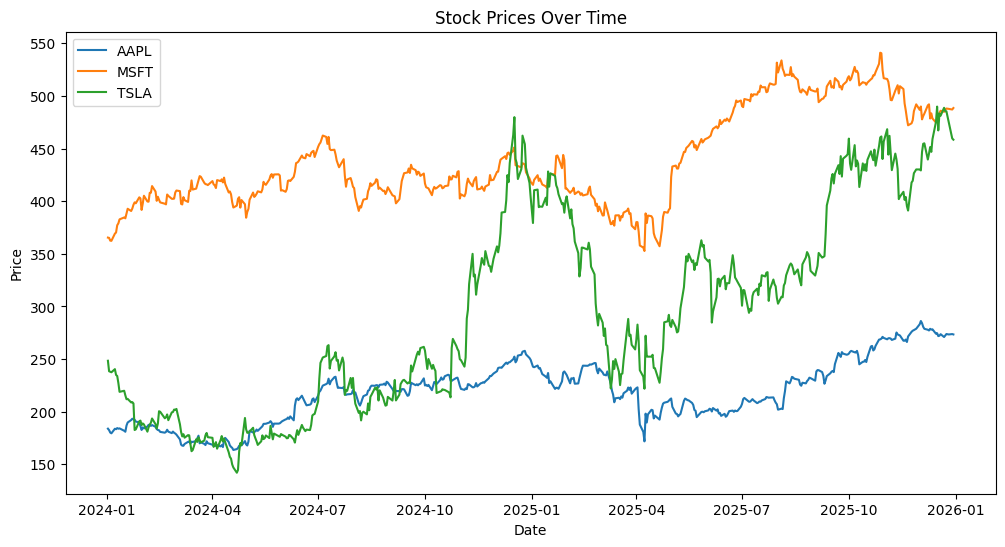

In [9]:
#Plot stock prices

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for stock in data_close.columns:
    plt.plot(data_close[stock], label=stock)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [10]:
# Save cleaned Close data to CSV
    
data_close.to_csv("../data/stock_close.csv")


In [11]:
# Load data close

import pandas as pd

data_close = pd.read_csv("../data/stock_close.csv", index_col=0)
data_close.index = pd.to_datetime(data_close.index)

data_close.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-02,183.903244,365.421631,248.419998
2024-01-03,182.526215,365.155579,238.449997
2024-01-04,180.208160,362.534637,237.929993
2024-01-05,179.484970,362.347473,237.490005
2024-01-08,183.823975,369.185486,240.449997


In [12]:
import os
os.getcwd()


'/Users/amin/equity-factor-model/notebooks'

In [13]:
os.listdir("../data")


['stock_close.csv',
 'factor_scores.csv',
 'drawdown.csv',
 'portfolio_returns.csv',
 'rolling_vol.csv',
 'final_factor_scores.csv',
 'daily_returns.csv',
 'cumulative_returns.csv',
 'stock_data.csv']

In [14]:
import os
import pandas as pd
import yfinance as yf

# confirm where we are
print("Current directory:", os.getcwd())

# download data
stocks = ["AAPL", "MSFT", "TSLA"]
data = yf.download(stocks, start="2024-01-01", end="2025-12-31")

# extract Close prices
data_close = data["Close"]

# create data folder ONE LEVEL UP
data_path = os.path.abspath("../data")
os.makedirs(data_path, exist_ok=True)

# full file path
file_path = os.path.join(data_path, "stock_close.csv")

# save
data_close.to_csv(file_path)

print("Saved to:", file_path)


[                       0%                       ]

Current directory: /Users/amin/equity-factor-model/notebooks


[*********************100%***********************]  3 of 3 completed

Saved to: /Users/amin/equity-factor-model/data/stock_close.csv


In [15]:
os.listdir("../data")


['stock_close.csv',
 'factor_scores.csv',
 'drawdown.csv',
 'portfolio_returns.csv',
 'rolling_vol.csv',
 'final_factor_scores.csv',
 'daily_returns.csv',
 'cumulative_returns.csv',
 'stock_data.csv']

In [16]:
data_close.head()


Ticker,AAPL,MSFT,TSLA
Date,,,
2024-01-02,183.903229,365.421600,248.419998
2024-01-03,182.526245,365.155579,238.449997
2024-01-04,180.208145,362.534607,237.929993
2024-01-05,179.484970,362.347443,237.490005
2024-01-08,183.823975,369.185516,240.449997


In [17]:
# Compute daily returns

daily_returns = data_close.pct_change()
daily_returns.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.007488,-0.000728,-0.040134
2024-01-04,-0.012700,-0.007178,-0.002181
2024-01-05,-0.004013,-0.000516,-0.001849
2024-01-08,0.024175,0.018872,0.012464


In [18]:
# Delete Missing data

daily_returns = daily_returns.dropna()
daily_returns.head()


Ticker,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.007488,-0.000728,-0.040134
2024-01-04,-0.012700,-0.007178,-0.002181
2024-01-05,-0.004013,-0.000516,-0.001849
2024-01-08,0.024175,0.018872,0.012464
2024-01-09,-0.002263,0.002936,-0.022832


In [19]:
# Save to CSV DATA

daily_returns.to_csv("../data/daily_returns.csv")


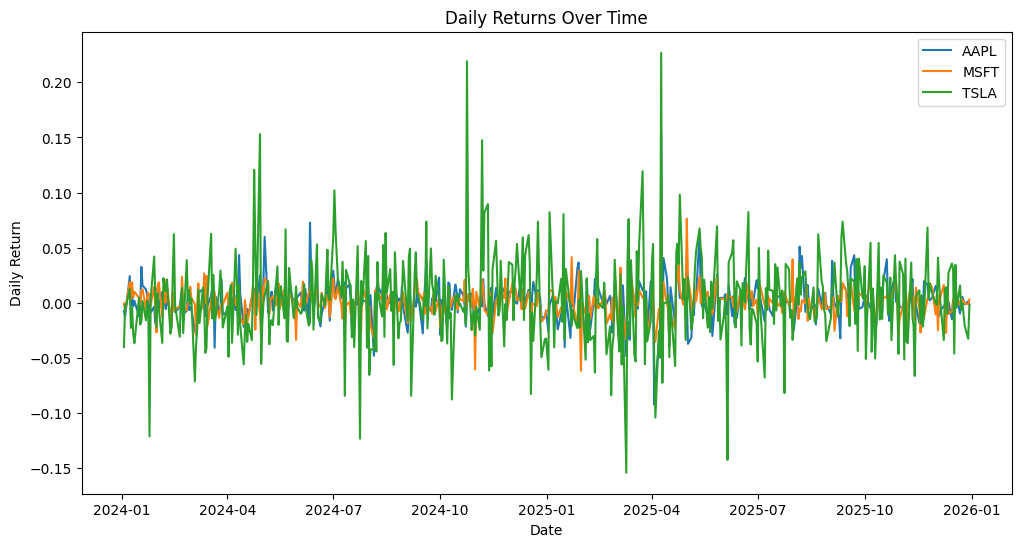

In [20]:
# PLOT daily Returns over time 

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for stock in daily_returns.columns:
    plt.plot(daily_returns[stock], label=stock)

plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


In [21]:
# Load daily returns 

import pandas as pd

daily_returns = pd.read_csv("../data/daily_returns.csv", index_col=0)
daily_returns.index = pd.to_datetime(daily_returns.index)

daily_returns.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.007488,-0.000728,-0.040134
2024-01-04,-0.012700,-0.007178,-0.002181
2024-01-05,-0.004013,-0.000516,-0.001849
2024-01-08,0.024175,0.018872,0.012464
2024-01-09,-0.002263,0.002936,-0.022832


In [22]:
#Compute and save rolling volatility

rolling_vol = daily_returns.rolling(window=21).std()
rolling_vol.head(25)
rolling_vol.to_csv("../data/rolling_vol.csv")


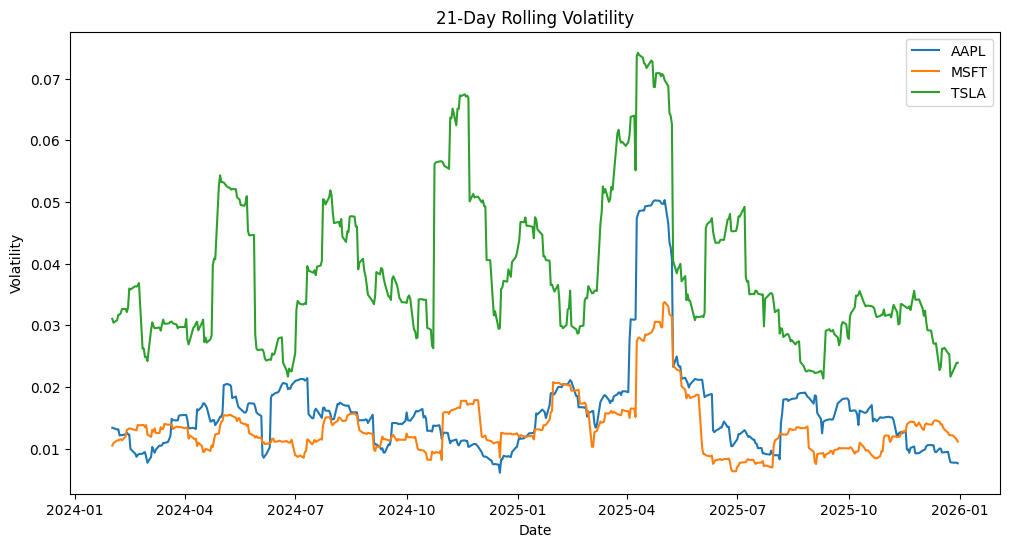

In [23]:
# Plot 21-day Rolling Volatility

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for stock in rolling_vol.columns:
    plt.plot(rolling_vol[stock], label=stock)

plt.title("21-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


In [24]:
# Create factor scores

factor_scores = (daily_returns - daily_returns.mean()) / daily_returns.std()
factor_scores.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.479553,-0.100542,-1.052777
2024-01-04,-0.775941,-0.561766,-0.104798
2024-01-05,-0.281989,-0.085402,-0.096517
2024-01-08,1.320779,1.301043,0.260987
2024-01-09,-0.182509,0.161454,-0.620624


In [25]:
# Save factor scores

factor_scores.to_csv("../data/factor_scores.csv")


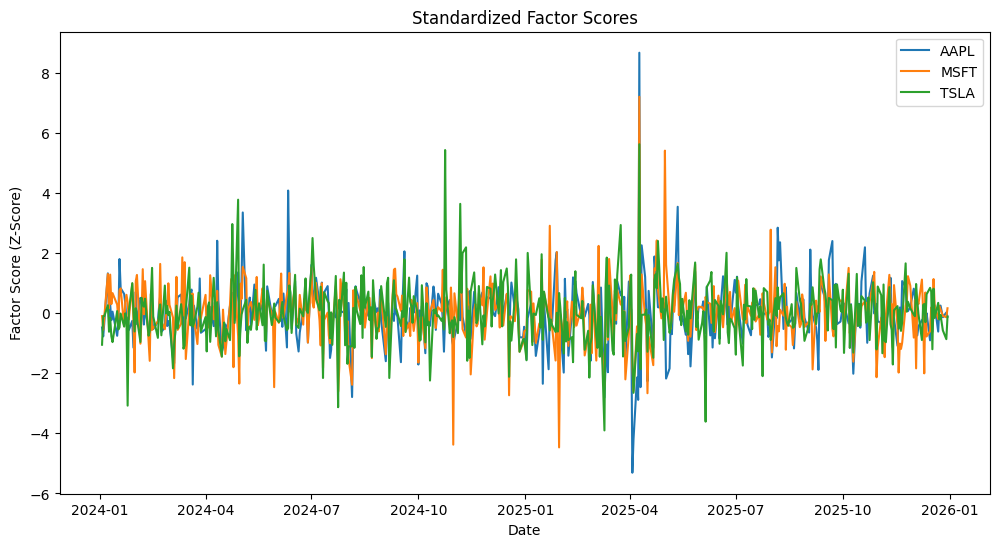

In [26]:
# plot factor scores 

plt.figure(figsize=(12,6))

for stock in factor_scores.columns:
    plt.plot(factor_scores[stock], label=stock)

plt.title("Standardized Factor Scores")
plt.xlabel("Date")
plt.ylabel("Factor Score (Z-Score)")
plt.legend()
plt.show()


In [27]:
import pandas as pd

# Load daily returns and factor scores
daily_returns = pd.read_csv("../data/daily_returns.csv", index_col=0)
factor_scores = pd.read_csv("../data/factor_scores.csv", index_col=0)

daily_returns.index = pd.to_datetime(daily_returns.index)
factor_scores.index = pd.to_datetime(factor_scores.index)

daily_returns.head()
factor_scores.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.479553,-0.100542,-1.052777
2024-01-04,-0.775941,-0.561766,-0.104798
2024-01-05,-0.281989,-0.085402,-0.096517
2024-01-08,1.320779,1.301043,0.260987
2024-01-09,-0.182509,0.161454,-0.620624


In [28]:
#Load rolling volatility

rolling_vol = pd.read_csv("../data/rolling_vol.csv", index_col=0)
rolling_vol.index = pd.to_datetime(rolling_vol.index)
rolling_vol.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,NaN,NaN,NaN
2024-01-04,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN
2024-01-08,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN


In [29]:
# Standardize volatility (z-score)

vol_factor = (rolling_vol - rolling_vol.mean()) / rolling_vol.std()
vol_factor = -vol_factor  # invert: high volatility = low score
vol_factor.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,NaN,NaN,NaN
2024-01-04,NaN,NaN,NaN
2024-01-05,NaN,NaN,NaN
2024-01-08,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN


In [30]:
# Combine factors (Momentum and Volatility)

combined_factors = pd.concat([factor_scores, vol_factor], axis=1)
combined_factors.head()


,AAPL,MSFT,TSLA,AAPL,MSFT,TSLA
Date,,,,,,
2024-01-03,-0.479553,-0.100542,-1.052777,NaN,NaN,NaN
2024-01-04,-0.775941,-0.561766,-0.104798,NaN,NaN,NaN
2024-01-05,-0.281989,-0.085402,-0.096517,NaN,NaN,NaN
2024-01-08,1.320779,1.301043,0.260987,NaN,NaN,NaN
2024-01-09,-0.182509,0.161454,-0.620624,NaN,NaN,NaN


In [31]:
# Compute final factor score

final_scores = combined_factors.T.groupby(combined_factors.columns.str.split('_').str[0]).mean().T

final_scores.head()

,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.479553,-0.100542,-1.052777
2024-01-04,-0.775941,-0.561766,-0.104798
2024-01-05,-0.281989,-0.085402,-0.096517
2024-01-08,1.320779,1.301043,0.260987
2024-01-09,-0.182509,0.161454,-0.620624


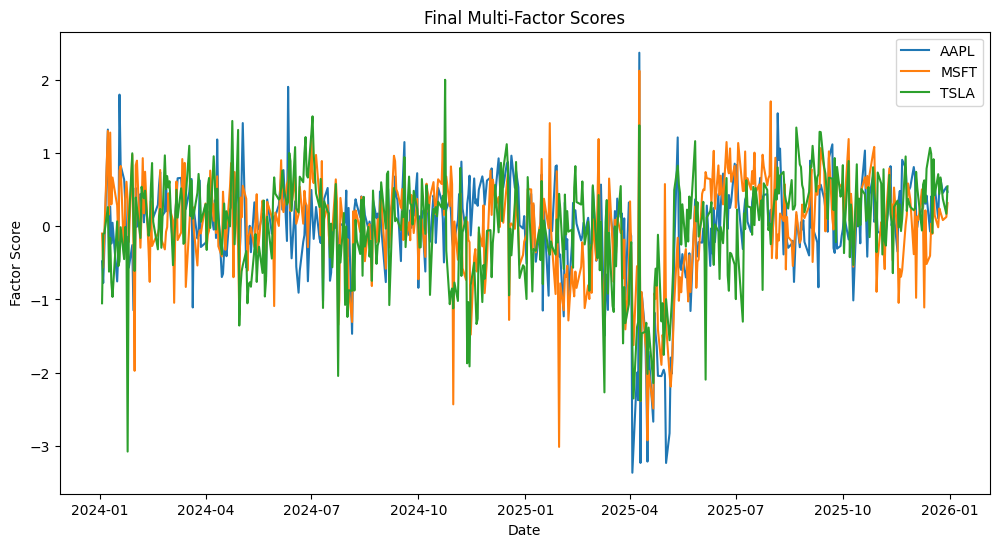

In [32]:
# Plot final factor scores

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for stock in final_scores.columns:
    plt.plot(final_scores[stock], label=stock)

plt.title("Final Multi-Factor Scores")
plt.xlabel("Date")
plt.ylabel("Factor Score")
plt.legend()
plt.show()


In [33]:
#Save final factor table

final_scores.to_csv("../data/final_factor_scores.csv")
